Fetching data for RELIANCE.NS...
Data fetched for RELIANCE.NS, calculating metrics...
Generating visualizations for RELIANCE.NS...


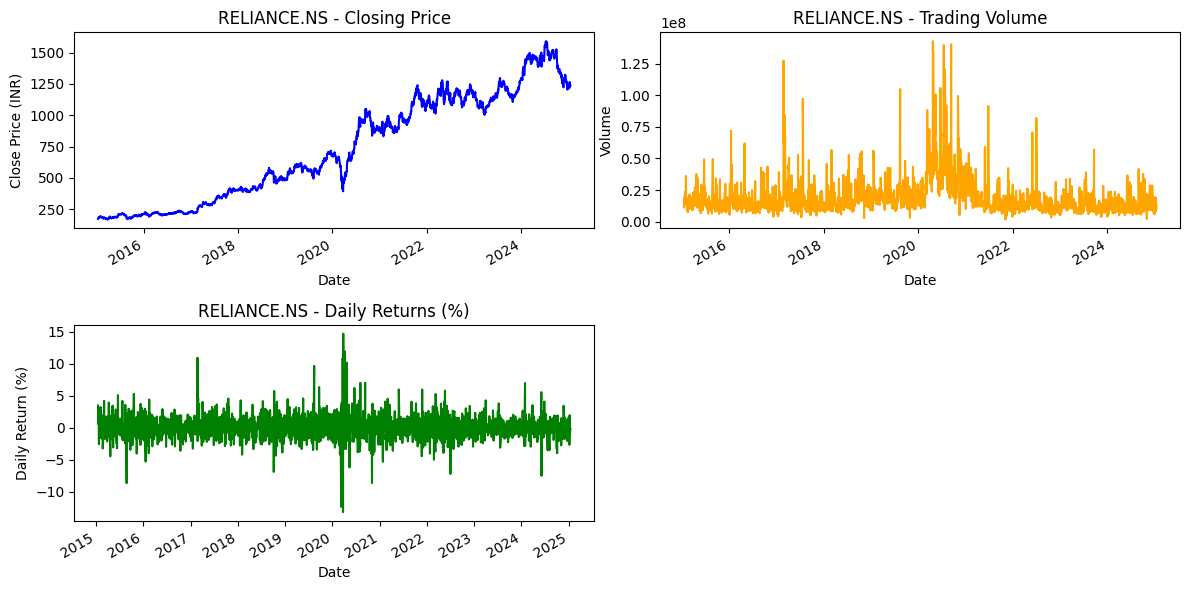

Fetching data for TCS.NS...
Data fetched for TCS.NS, calculating metrics...
Generating visualizations for TCS.NS...


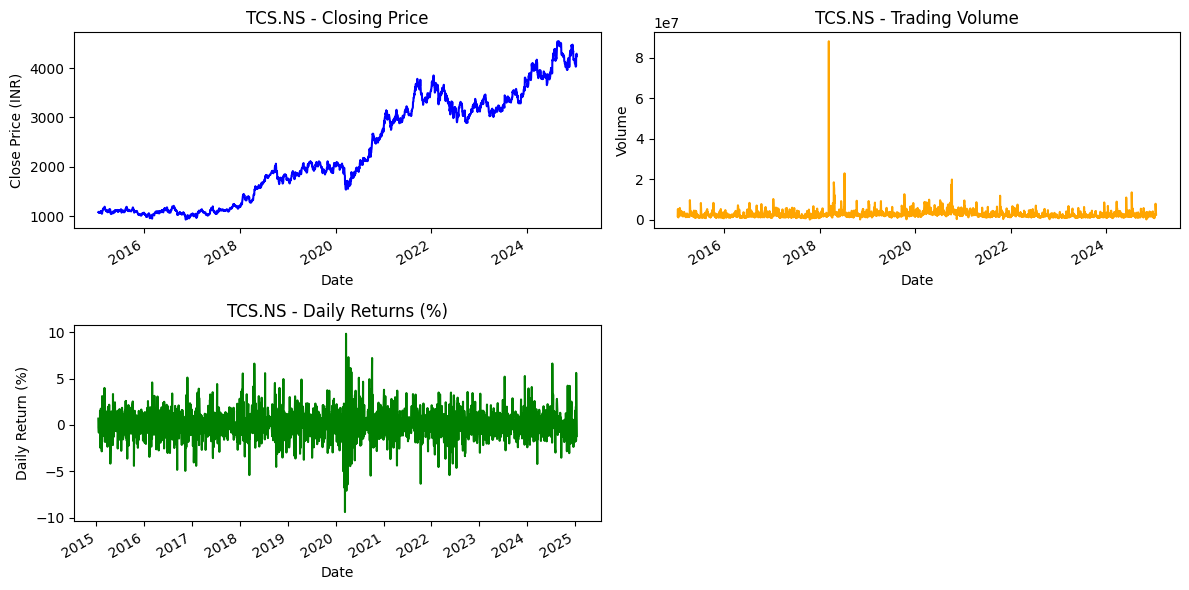

Fetching data for INFY.NS...
Data fetched for INFY.NS, calculating metrics...
Generating visualizations for INFY.NS...


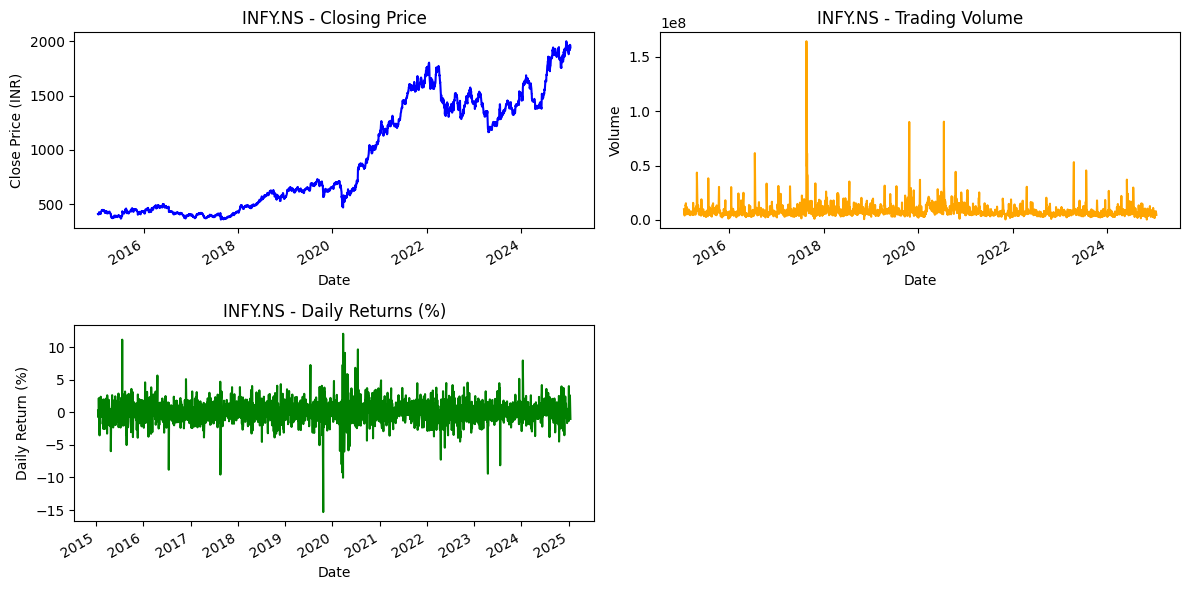

Fetching data for HDFCBANK.NS...
Data fetched for HDFCBANK.NS, calculating metrics...
Generating visualizations for HDFCBANK.NS...


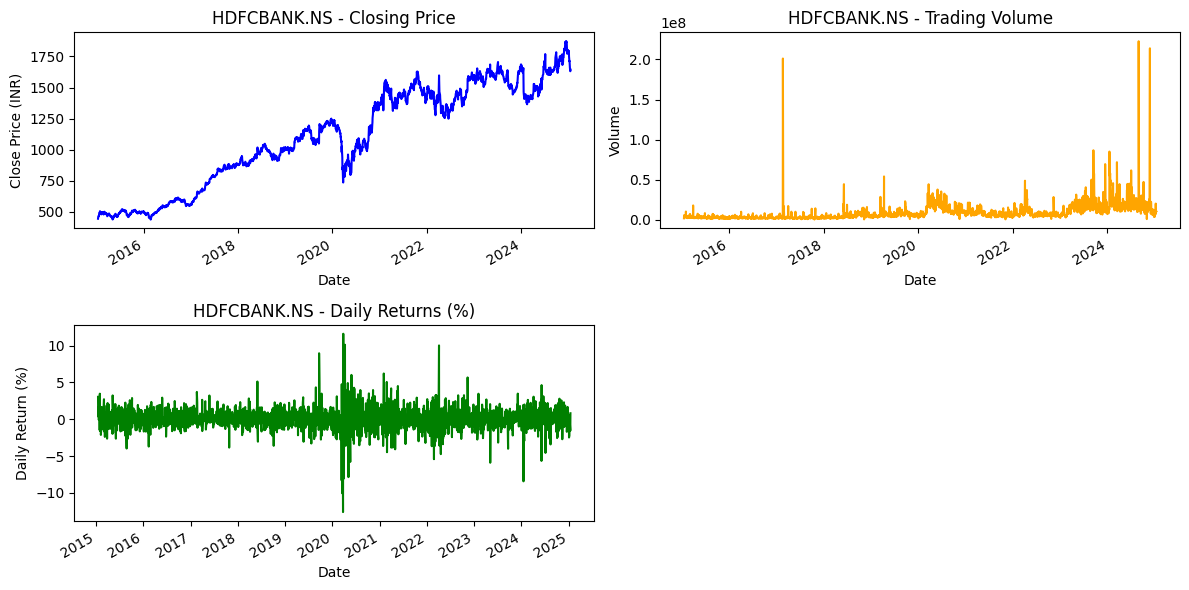

Fetching data for ICICIBANK.NS...
Data fetched for ICICIBANK.NS, calculating metrics...
Generating visualizations for ICICIBANK.NS...


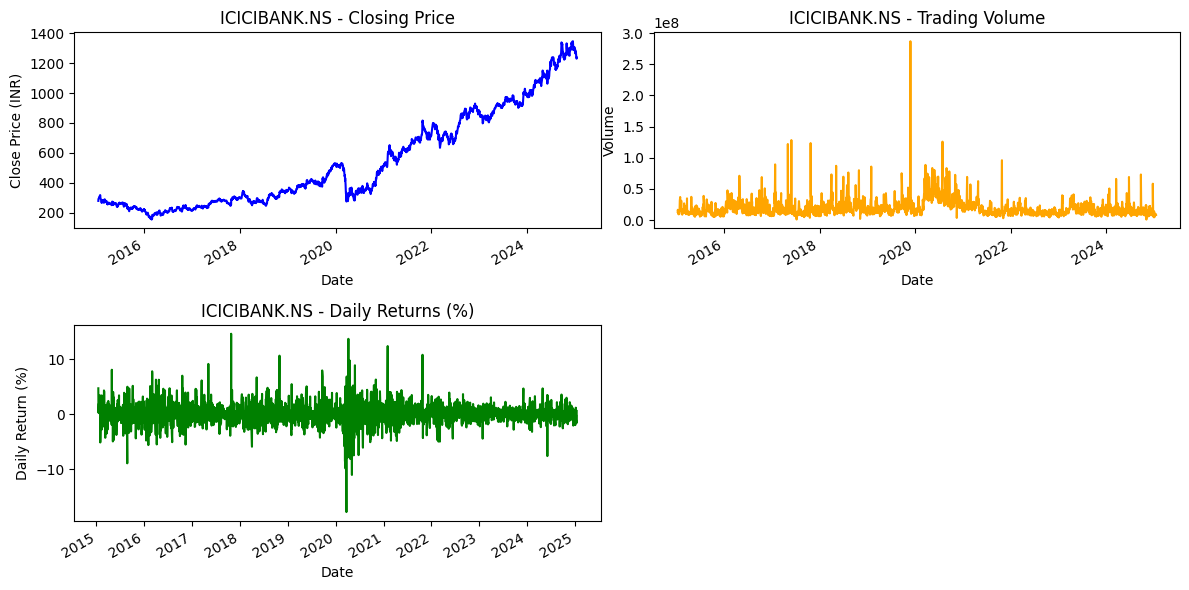

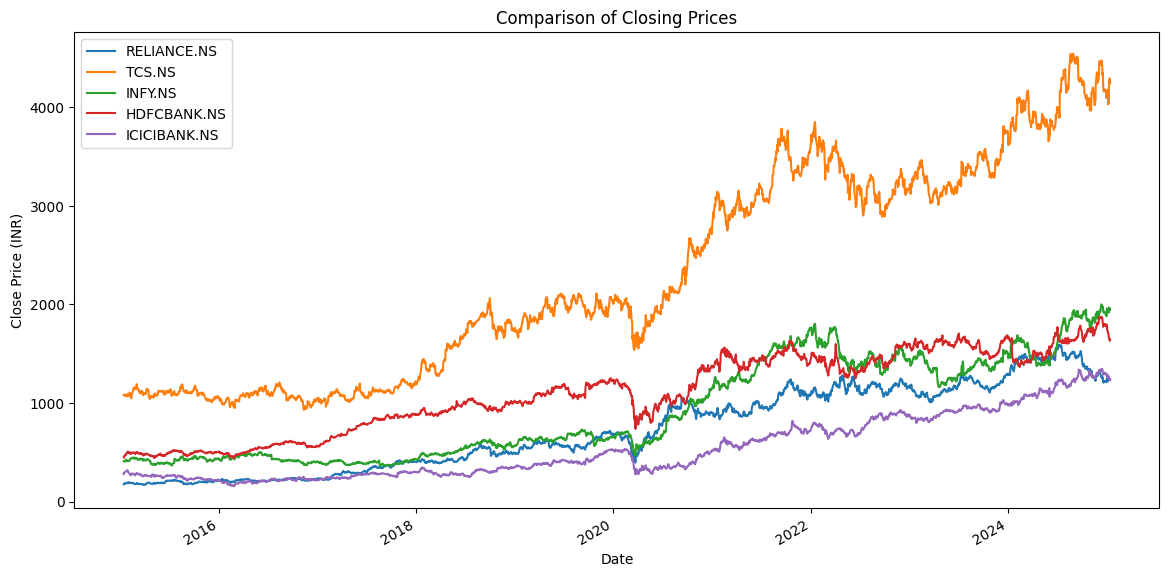

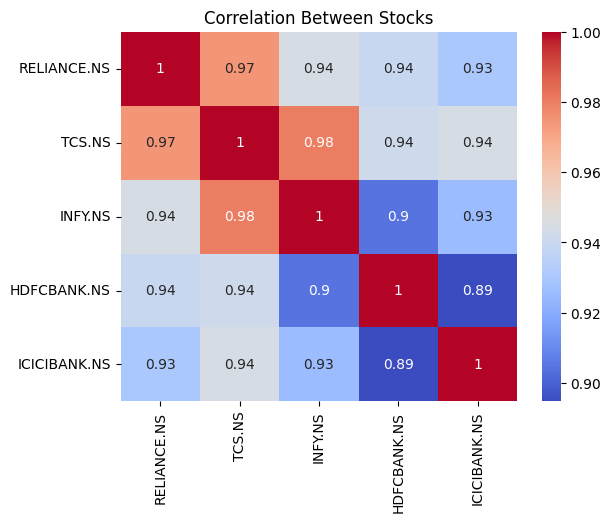

Report saved to Stock_Report.pdf.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fpdf import FPDF

def fetch_data(ticker_symbol):
    """Fetch 10 years of historical data for a stock."""
    ticker = yf.Ticker(ticker_symbol)
    return ticker.history(period="10y")

def calculate_metrics(data, ticker_symbol):
    """Calculate ROI, CAGR, and daily returns."""
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    days = (data.index[-1] - data.index[0]).days
    roi = ((end_price - start_price) / start_price) * 100
    cagr = ((end_price / start_price) ** (1 / (days / 365))) - 1

    # Add daily returns
    data['Daily Return'] = data['Close'].pct_change() * 100

    return {
        "Ticker": ticker_symbol,
        "Start Price": start_price,
        "End Price": end_price,
        "ROI (%)": roi,
        "CAGR (%)": cagr * 100
    }

def generate_visualizations(data, ticker_symbol):
    """Generate visualizations for a stock."""
    plt.figure(figsize=(12, 6))

    # Plot the closing price
    plt.subplot(2, 2, 1)
    data['Close'].plot(title=f"{ticker_symbol} - Closing Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Close Price (INR)")

    # Plot the trading volume
    plt.subplot(2, 2, 2)
    data['Volume'].plot(title=f"{ticker_symbol} - Trading Volume", color='orange')
    plt.xlabel("Date")
    plt.ylabel("Volume")

    # Plot daily returns
    plt.subplot(2, 2, 3)
    data['Daily Return'].plot(title=f"{ticker_symbol} - Daily Returns (%)", color='green')
    plt.xlabel("Date")
    plt.ylabel("Daily Return (%)")

    plt.tight_layout()
    plt.show()

    # Interactive cumulative return chart
    data['Cumulative Return'] = (1 + data['Daily Return'] / 100).cumprod()
    fig = px.line(data.reset_index(), x='Date', y='Cumulative Return',
                  title=f"{ticker_symbol} - Cumulative Returns")
    fig.show()

def generate_report(stock_metrics, file_name="Stock_Report.pdf"):
    """Generate a PDF report of the stock analysis."""
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)

    pdf.add_page()
    pdf.set_font("Arial", size=12)

    pdf.set_text_color(0, 0, 0)
    pdf.cell(200, 10, txt="Stock Analysis Report", ln=True, align="C")
    pdf.ln(10)

    # Add stock metrics
    for stock in stock_metrics:
        pdf.set_font("Arial", style="B", size=12)
        pdf.cell(200, 10, txt=f"Stock: {stock['Ticker']}", ln=True, align="L")
        pdf.set_font("Arial", size=11)
        pdf.cell(200, 10, txt=f"Start Price: {stock['Start Price']:.2f}", ln=True)
        pdf.cell(200, 10, txt=f"End Price: {stock['End Price']:.2f}", ln=True)
        pdf.cell(200, 10, txt=f"ROI: {stock['ROI (%)']:.2f}%", ln=True)
        pdf.cell(200, 10, txt=f"CAGR: {stock['CAGR (%)']:.2f}%", ln=True)
        pdf.ln(10)

    pdf.output(file_name)
    print(f"Report saved to {file_name}.")

def analyze_top_5_stocks(tickers):
    """Analyze the top 5 stocks and compare their data."""
    results = {}
    metrics = []

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        data = fetch_data(ticker)
        results[ticker] = data
        print(f"Data fetched for {ticker}, calculating metrics...")
        metrics.append(calculate_metrics(data, ticker))
        print(f"Generating visualizations for {ticker}...")
        generate_visualizations(data, ticker)

    # Compare stocks' closing prices over time
    combined_data = pd.DataFrame({ticker: results[ticker]['Close'] for ticker in tickers})
    combined_data.plot(figsize=(14, 7), title="Comparison of Closing Prices")
    plt.ylabel("Close Price (INR)")
    plt.xlabel("Date")
    plt.legend(tickers)
    plt.show()

    # Heatmap of correlations between stocks
    correlation = combined_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title("Correlation Between Stocks")
    plt.show()

    # Return data and metrics for further analysis
    return results, metrics

def main():
    # Top 5 Indian stock ticker symbols (NSE)
    top_5_tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]

    # Analyze and visualize the data
    stock_data, stock_metrics = analyze_top_5_stocks(top_5_tickers)

    # Exporting data to Excel
    # Exporting data to Excel
    with pd.ExcelWriter("Top_5_Stocks_Analysis.xlsx") as writer:
        for ticker, data in stock_data.items():
            # Remove timezone awareness from the index
            data.index = data.index.tz_localize(None)
            data.to_excel(writer, sheet_name=ticker)

    # Generate a PDF report
    generate_report(stock_metrics)

if __name__ == "__main__":
    main()
